<a href="https://colab.research.google.com/github/tsintzask/networkx-assessment/blob/main/tsintzask_networkx_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Κωνσταντίνος Τσίντζας"
AEM = "3113"

# Mini assessment

This assessment gives you a brief introduction to the NetworkX library. NetworkX is a python library for graphs. To complete this assessment, you can guide [NetworkX documentation](https://networkx.org/documentation/stable/reference/index.html).

## Import the libraries

Run the below cell to import the libraries.

In [2]:
# Run this cell
import requests
import json
import networkx as nx
import matplotlib.pyplot as plt

## Download data

Run the bellow cell to get the Twitter data in the `data` variable. The data contains a list of 1921 tweets that contain the hashtag #ελισσαβετ. This hashtag was created when Queen Elizabeth II died by Twitter users.

In [3]:
# Run this cell
url = 'https://drive.google.com/u/1/uc?id=1ngDx0bNya_0kh_tRwhyEgw5vMBFBHjkw&export=download'
res = requests.get(url)
data = res.json()

Run the cell below to see the Tweet object. The cell will print the first row from the `data` variable.

In [12]:
# Run this cell
data[0]

{'_id': {'$oid': '632485805a7650a4a19b04ce'},
 'reply_settings': 'everyone',
 'conversation_id': 1570776062543679500,
 'author_id': 2967448373,
 'referenced_tweets': [{'type': 'retweeted', 'id': 1570493032159649800}],
 'text': 'RT @KYTKYTKYTKYTKYT: Κοιτάχτε χάλι ο "βασιλευς"! 😂\n\n#Καρολος #ελισσαβετ #QueenElisabeth #Meghan #Charles https://t.co/o9pCuttj5V',
 'source': 'Twitter for Android',
 'entities': {'mentions': [{'start': 3,
    'end': 19,
    'username': 'KYTKYTKYTKYTKYT',
    'id': '1052877677605134336'}],
  'urls': [{'start': 105,
    'end': 128,
    'url': 'https://t.co/o9pCuttj5V',
    'expanded_url': 'https://twitter.com/KYTKYTKYTKYTKYT/status/1570493032159649792/photo/1',
    'display_url': 'pic.twitter.com/o9pCuttj5V',
    'media_key': '3_1570492729934712833'}],
  'hashtags': [{'start': 52, 'end': 60, 'tag': 'Καρολος'},
   {'start': 61, 'end': 71, 'tag': 'ελισσαβετ'},
   {'start': 72, 'end': 87, 'tag': 'QueenElisabeth'},
   {'start': 88, 'end': 95, 'tag': 'Meghan'},
   {'

## Graph creation

**Exercise**: Create the mentioned undirected graph using the Twitter data from the `data` variable. On Twitter, a user can mention a user by adding his username to his tweet. Look at the tweets object from the `data` variable and find the included mentions. The user that created the tweet can be found under the author field. So to create the mentioned graph, you need to add an edge between the author and the users he mentioned in the tweet. Then, you need to remove the isolated nodes and keep only the giant connected component. Finally, save the graph instance in the `graph` variable.

In [14]:
graph = nx.Graph()
# BEGIN CODE HERE

# Gathering all relevant user IDs and mentions in a set - python sets do not keep duplicate elements, which is very handy here
userIDs = set()
mentions = set()

for tweet in data:
  if 'mentions' in tweet['entities'].keys(): # Filtering tweets to only include those that mention other users, avoiding isolated nodes (Kind of redundant as we're only keeping the giant connected component, but probably a good practice)

    userIDs.add(tweet['author_id']) # Adding tweeting users

    for mention in tweet['entities']['mentions']:

      userIDs.add(mention['id']) # Adding mentioned users

      mentions.add((tweet['author_id'],mention['id'])) # Storing who mentions who, for the edges

# Adding all relevant user IDs and mentions to the graph - this could have been done inside the iterations previously, but I chose not to for the sake of clarity
graph.add_nodes_from(userIDs)
graph.add_edges_from(mentions)

# Keeping only the giant connected component of the graph
graph_components = nx.connected_components(graph)
graph_components = sorted(graph_components, key = len, reverse = True)
graph = graph.subgraph(graph_components[0])

# Personal note - I assume it's because this is just for the test, but normally, a directed graph would be more appropriate to plot twitter mentions, right?

# Secondary note - I am currently unsure as to why no instances of users mentioning themselves were found, even though the given graph seems to show some such instances. I'll update this if I find out anything more.

# END CODE HERE

## Graph properties

In the section, you need to calculate some graph properties.

**Exercise**: Calculate the total number of nodes.

In [15]:
# BEGIN CODE HERE

print("Number of nodes:",graph.number_of_nodes()) # There's functions ready for the number of both nodes and edges.

# END CODE HERE

Number of nodes: 970


**Exercise**: Calculate the total number of edges.

In [16]:
# BEGIN CODE HERE

print("Number of edges:",graph.number_of_edges())

# END CODE HERE

Number of edges: 1142


**Exercise**: Calculate and display the five most important users.

In [17]:
# BEGIN CODE HERE

# Quick note - by most important users, we basically mean the highest degree nodes

node_degrees = graph.degree() # Retrieving node degree info, in tuples of form (user_id, degree)

leaderboard = sorted(node_degrees, key = lambda i: i[1], reverse = True) # Sorting by the second element of each tuple, and reversing order so it's descending rather than ascending

top_5 = leaderboard[0:5] # Picking the top 5 most important users

# Printing results
print("Top 5 most important users (mentioned others or were mentioned the most):")
for element in top_5:
  print("User with ID",element[0],"had",element[1],"mentions")

# END CODE HERE

Top 5 most important users (mentioned others or were mentioned the most):
User with ID 3350101935 had 203 mentions
User with ID 1493253454554443778 had 108 mentions
User with ID 1478351447620308994 had 82 mentions
User with ID 1425023935758979083 had 81 mentions
User with ID 1524049013632339969 had 64 mentions


## Graph Visualization

Visualize the graph that you have created using the below code cell.

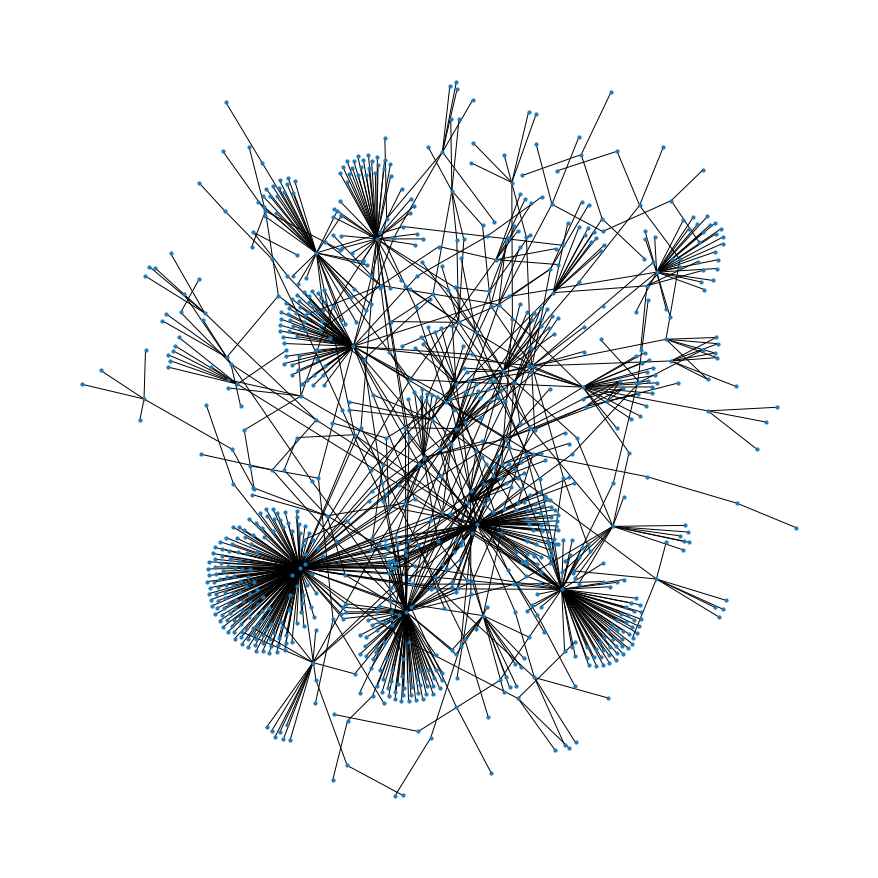

In [18]:
# Run this cell
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(graph, k=0.1, seed=0)
nx.draw(graph, pos, node_size=10, font_size=8)

If the graph has been created successfully, then the image should be the same as below.

<img src='https://drive.google.com/uc?id=1fHnHQK1uZxeEzisQ78qdnOzhivQ1e0OM' />